<a href="https://colab.research.google.com/github/AhmedSayedAbdelrazek/A-Visual-History-of-Nobel-Prize-Winners/blob/main/FAKENEWSVERSIO2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [133]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string
import seaborn as sns

In [134]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [135]:
df_fake = pd.read_csv("/content/drive/MyDrive/Fake.csv")
df_real = pd.read_csv("/content/drive/MyDrive/True.csv")

In [136]:
df_fake.head(5)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [137]:
df_real.shape

(21417, 4)

In [138]:
df_fake.shape

(23481, 4)

In [139]:
df_fake["class"] = 0
df_real["class"] = 1

In [140]:
df_fake.shape 


(23481, 5)

In [141]:
df_real.shape

(21417, 5)

In [142]:
df_merge = pd.concat([df_fake, df_real], axis =0 )
df_merge.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [143]:
df_merge.shape

(44898, 5)

In [144]:
print(df_merge.isnull().sum())  # printing sum of null values 

title      0
text       0
subject    0
date       0
class      0
dtype: int64


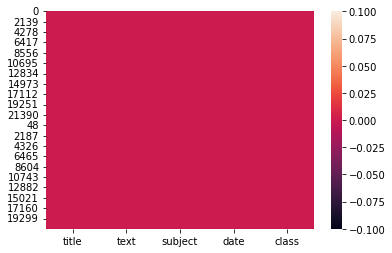

In [145]:
sns.heatmap(df_merge.isna())   #showing null value in heatmap plot
plt.show()

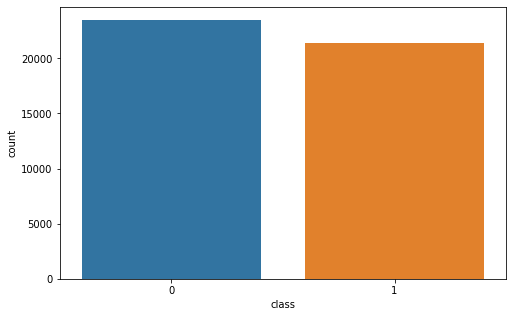

In [146]:
plt.figure(figsize=(8,5))
sns.countplot(x='class',data=df_merge) #plot for showing numbers of real and fake news
plt.show()

In [147]:
df = df_merge.sample(frac = 1)

In [148]:
df.head(10)

,title,text,subject,date,class
4805,Trump BANS Campaign Volunteers From Talking A...,Campaign volunteers are key to a winning presi...,News,"September 1, 2016",0
1102,Trump’s Legal Team Directly Contradicts Him O...,"Despite his tweets, apparently Trump isn t bei...",News,"June 18, 2017",0
22996,BREAKING: Michael Flynn Resigns as Trump’s Nat...,21st Century Wire says The scandal emerged af...,Middle-east,"February 14, 2017",0
22932,SUNDAY SCREENING: ‘Air America: The CIA’s Secr...,"Our weekly documentary film, curated by our ed...",Middle-east,"March 26, 2017",0
598,"Mooch Changes His Tune, Says Reporter ‘Absolu...",So here s a funny hypothetical: You re a White...,News,"August 10, 2017",0
15888,OH NO! GUESS WHO FUNDED THE SHRINE TO TED KENNEDY,Nothing like political cronyism to make your s...,politics,"Mar 31, 2015",0
13027,HERE’S WHY You Should Boycott The NFL Starting...,The disgraceful behavior of multi-millionaire...,politics,"Sep 13, 2016",0
3695,Wil Wheaton Just RAZED Trump’s Racist Support...,Have you noticed that Donald Trump s supporter...,News,"November 23, 2016",0
13568,BOOM! GOP Makes BLISTERING Video Using FBI Dir...,America should ve known Hillary would be allow...,politics,"Jul 6, 2016",0
7678,New Jersey 'Bridgegate' judge delays closing a...,"NEWARK, N.J. (Reuters) - Closing arguments in ...",politicsNews,"October 27, 2016",1


In [149]:
df_merge.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

In [150]:
df = df_merge.drop(["title", "subject","date"], axis = 1)

In [151]:
df.isnull().sum()

text     0
class    0
dtype: int64

In [152]:
df.reset_index(inplace = True)
df.drop(["index"], axis = 1, inplace = True)

In [153]:
df.columns

Index(['text', 'class'], dtype='object')

In [154]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [155]:
df["text"] = df["text"].apply(wordopt)

In [156]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [157]:
#defining stopwords
stop_words = stopwords.words('english')
stop_words.extend(['use', 're', 'edu', 'from', 'also'])


In [158]:
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
#function which stop words and the words less than 2 characters
def remove_stop_words (text):
  result = []
  for token in gensim.utils.simple_preprocess(text):
    if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3 and token not in stop_words:
      result.append(token)
  return result

In [159]:
df.head(10)

,text,class
0,donald trump just couldn t wish all americans ...,0
1,house intelligence committee chairman devin nu...,0
2,on friday it was revealed that former milwauk...,0
3,on christmas day donald trump announced that ...,0
4,pope francis used his annual christmas day mes...,0
5,the number of cases of cops brutalizing and ki...,0
6,donald trump spent a good portion of his day a...,0
7,in the wake of yet another court decision that...,0
8,many people have raised the alarm regarding th...,0
9,just when you might have thought we d get a br...,0


In [160]:
df.columns

Index(['text', 'class'], dtype='object')

In [161]:
df['text'] = df['text'].apply(remove_stop_words)
df['text'] = df['text'].apply(lambda x: " ".join(x))


In [162]:
df.head(15)

,text,class
0,donald trump wish americans happy year leave i...,0
1,house intelligence committee chairman devin nu...,0
2,friday revealed milwaukee sheriff david clarke...,0
3,christmas donald trump announced work followin...,0
4,pope francis annual christmas message rebuke d...,0
5,number cases cops brutalizing killing people c...,0
6,donald trump spent good portion golf club mark...,0
7,wake court decision derailed donald trump plan...,0
8,people raised alarm fact donald trump dangerou...,0
9,thought break watching people kiss donald trum...,0


In [163]:
x = df["text"]
y = df["class"]

In [164]:
x[0]

'donald trump wish americans happy year leave instead shout enemies haters dishonest fake news media reality star country rapidly grows stronger smarter want wish friends supporters enemies haters dishonest fake news media happy healthy year president angry pants tweeted great year america country rapidly grows stronger smarter want wish friends supporters enemies haters dishonest fake news media happy healthy year great year america donald trump realdonaldtrump december tweet went welll expect kind president sends year greeting like despicable petty infantile gibberish trump lack decency allow rise gutter long wish american citizens happy year bishop talbert swan talbertswan december likes calvin calvinstowell december impeachment great year america accept regaining control congress miranda yaver mirandayaver december hear talk include people hate wonder hate alan sandoval december uses word haters years wish marlene december happy year koren pollitt korencarpenter december trump year

In [165]:
y[0]

0

In [166]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import PassiveAggressiveClassifier 
import matplotlib.pyplot as plt
from sklearn import metrics 

In [167]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [168]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

In [169]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(xv_train,y_train)


LogisticRegression()

In [170]:
pred_lr=LR.predict(xv_test)

In [171]:
LR.score(xv_test, y_test)

0.9820044543429844

In [172]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      5859
           1       0.98      0.98      0.98      5366

    accuracy                           0.98     11225
   macro avg       0.98      0.98      0.98     11225
weighted avg       0.98      0.98      0.98     11225



In [ ]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)

In [ ]:
pred_dt = DT.predict(xv_test)

In [ ]:
DT.score(xv_test, y_test)

In [ ]:
print(classification_report(y_test, pred_dt))

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(random_state=0)
RFC.fit(xv_train, y_train)

In [ ]:
pred_rfc = RFC.predict(xv_test)
RFC.score(xv_test, y_test)

In [ ]:
print(classification_report(y_test, pred_rfc))

In [ ]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm,classes,normalize=False,title='Confusion Matrix',cmap=plt.cm.Dark2):
  plt.imshow(cm,interpolation='nearest',cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks=np.arange(len(classes))
  plt.xticks(tick_marks,classes,rotation=45)
  plt.yticks(tick_marks,classes)
  if normalize:
    cm=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
    print("normalize confusion matrix")
  else:
    print('confusion matric,without normalization')

  thresh = cm.max() / 2
  for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="yellow" if cm[i, j] > thresh else "red")
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')    

In [ ]:
#Predict and calculate accuracy
pred_lr=LR.predict(xv_test)
score = LR.score(xv_test, y_test)
print(f'Accuracy: {round(score*100,2)}%')
cm = metrics.confusion_matrix(y_test,pred_lr)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

In [132]:
def check_news(news):
    input_data = [news]
    vectorized_input_data =vectorization.transform(input_data)
    prediction = LR.predict(vectorized_input_data)
    print(prediction)

In [ ]:
check_news("WASHINGTON (Reuters) - Disagreement among U.S. congressional Republicans is already swirling around a tax cut plan unveiled days ago by President Donald Trump, who has proposed repealing the tax on inheritances and eliminating a deduction for state and local tax payments. The discord shows the difficulty of overhauling the complex U.S. tax code. This task has defied Washington since 1986, the last time a comprehensive rewrite was completed despite lobbyists who defend each tax break. Trump has yet to score a major legislative win since taking office in January and is pushing hard for a tax code revamp. But his plan is meeting the same internal Republican tensions between moderates and conservatives that have sunk his efforts this year to repeal the Obamacare health law. â€œThereâ€™s a lot of give and take,â€ Trump economic adviser Gary Cohn told Fox Business Network on Friday.  Members of the administration â€œhave been meeting everyday with the tax writers trying to figure out where they need to end up to get the votes ... weâ€™re going to make sure the president gets what he asks for,â€ he added. One obstacle is the projected fiscal impact of the plan, which would slash U.S. revenues and expand the federal deficit and the national debt, which now exceeds $20 trillion. Republican lawmakers from high-tax states such as New York exited meetings this week with Kevin Brady, chairman of the House of Representativesâ€™ tax-writing committee, saying there would be some sort of compromise on repealing the deduction for state and local tax payments. Separately, some Republican senators were questioning the repeal of a 40 percent inheritance tax levied on estate assets worth more than $5.5 million, or $11 million for married couples. That tax affects only about 0.2 percent of estates, according to the Tax Policy Center, a Washington think tank. â€œThat is not a priority for me as we seek to craft this tax bill,â€ Senator Susan Collins, who has often been a key Republican vote, said in a statement on Thursday. Republicans want to use a procedure known as budget reconciliation to pass eventual tax legislation, which allows passage with a simple majority in the 100-seat Senate. Republicans hold 52 Senate seats and can only afford to lose support from two senators, with Vice President Mike Pence able to cast a tie-breaking vote. Democrats will likely oppose the legislation.  One Republican fiscal hawk, Senator Bob Corker, has already said he cannot support tax legislation that adds to the annual federal deficit. â€œWe remain very bearish on any tax legislation passing this year - or next,â€ Cowen and Co analyst Chris Krueger said in a Friday research note. The Trump plan, made public last week, calls for up to $6 trillion in tax cuts over 10 years. Without accompanying spending reductions, the budget would hugely expand the deficit, according to some estimates.  The administration contends tax cuts would spur so much economic growth that the resulting new revenues would help offset the cost. In addition, Republicans are proposing â€œrevenue raisers,â€ such as ending the deduction for payments of state and local tax, known as SALT. Doing that would raise about $1.3 trillion over a decade, the Tax Policy Center said. Almost 30 percent of taxpayers currently deduct state and local taxes. In New Jersey, for example, 41 percent of tax filers, meaning individuals or married couples, claimed the deduction, which averaged $17,850, according to a Government Finance Officers Association analysis of Internal Revenue Service data. Although the deduction disproportionately benefits people in high-tax states and localities, individuals in all states claim it. In Georgia, for example, 33 percent of tax filers claim an average deduction of $9,158, the report said. Republican Representative Chris Collins of New York, a Trump ally, told reporters earlier this week that lawmakers from high-tax states, such as his own, were discussing â€œways to level the playing field,â€ including capping the amount of the deduction or putting other limits on it. â€œThere are many districts with Republican members where state and local deduction is used by a large portion of the taxpayers,â€ said Frank Sammartino, a senior fellow at the Tax Policy Center. â€œSo itâ€™s not surprising that itâ€™s not strictly a blue state/red state thing.â€ Senate Democratic leader Chuck Schumer called the state and local tax deduction the â€œAchillesâ€™ heelâ€ of tax reform and said his party would oppose any move to repeal it. He dismissed compromise plans as unfeasible. Brady said on Thursday that at this point there has been no change to the framework, but tax writers are â€œlistening very carefullyâ€ to lawmakersâ€™ concerns. â€œItâ€™s got to be frustrating when youâ€™re in a state where local and state officials really put the screws to taxpayers,â€ Brady told reporters. â€œWe are determined to provide tax relief to every American, regardless of where they live.â€ ")